### Genetski algoritam

### Znacajni parametri

In [6]:
TOURNAMENT_SIZE = 10
POPULATION_SIZE = 150
MUTATION_RATE = 0.1
MAX_ITERATION = 100
ELITE_SIZE = 60

In [7]:
import codecs
import time

def parse_dimacs_to_list(graph_file_name):
    
    graph_list = []
    dim = 0

    with codecs.open(graph_file_name, encoding='ascii') as graph_text:
    
        for line in graph_text:
            if line.startswith('e'):
                line = line[:-2]  
                line = line.split(' ')
                del line[0]    
                int_list = list(map(int,line))
                dim = max(dim, int(int_list[0]), int(int_list[1]))

        print('Dimenzija: ',dim)

        for i in range(0,dim+1):
            graph_list.append([])
        

    #popunjavanje liste
    with codecs.open(graph_file_name, encoding='ascii') as graph_text:        

        for line in graph_text:
            if line.startswith('e'):
                #print(line)
                line = line[:-2]  
                line = line.split(' ')
                del line[0]    
                int_list = list(map(int,line))
                #print(int_list)
                #print(int_list[0],int_list[1])
                graph_list[int_list[0]].append(int_list[1])
                graph_list[int_list[1]].append(int_list[0])
                #print(graph_list)


    return graph_list


In [8]:
def transpose(graph):
    for n, i in enumerate(graph):
        for m, j in enumerate(i):
            graph[n][m] = j - 1

In [9]:
graph0 = [[3],[3],[3],[0,1,2,4],[3,5,6,7],[4],[4],[4]]

#mali (4)
graph1 = parse_dimacs_to_list('graph1.txt')
graph1.pop(0) 
transpose(graph1)
#print(graph1)

#srednji (6)
graph2 = parse_dimacs_to_list('graph2.txt')
graph2.pop(0) 
transpose(graph2)
#print(graph2)

#srednje boja mnogo cvorova (20)
graph3 = parse_dimacs_to_list('graph3.txt')
graph3.pop(0) 
transpose(graph3)
#print(graph3)

#mnogo boja mnogo cvorova  (42)
graph4 = parse_dimacs_to_list('graph4.txt')
graph4.pop(0) 
transpose(graph4)
#print(graph4)

#mnogo covrova malo boja (8)
graph5 = parse_dimacs_to_list('graph5.txt')
graph5.pop(0) 
transpose(graph5)
#print(graph5)

#mnogo cvorova malo grana (9)
graph6 = parse_dimacs_to_list('graph6.txt')
graph6.pop(0) 
transpose(graph6)
#print(graph6)

Dimenzija:  11
Dimenzija:  47
Dimenzija:  128
Dimenzija:  128
Dimenzija:  95
Dimenzija:  120


In [10]:
import random

class Individual:
    
    
    def __init__(self,graph):
        self.graph = graph
        self.colors = self.initColors(graph)
        self.fitness = 0
        self.oldValue = 0
        
    def __lt__(self,other):
        return self.fitness < other.fitness
    
    def findAdjColors(self,i):
        adjColors = []
        for ajd in self.graph[i]:
            adjColors.append(self.colors[ajd])
        return adjColors
    
    def isFeasible(self):
        for i in range(len(self.graph)):
            for neigh in self.graph[i]:
                if(self.colors[i]==self.colors[neigh]):
                    return False
            
        return True
        
        # biramo resenje iz okoline
# random odaberemo indeks i smanjimo mu vrednost boje   
    def adjacentSolution(self):
        position = random.randrange(0,len(self.graph))
        self.oldValue = self.colors[position]
      #  if self.colors[position]==1:
       #     self.colors[position]=self.colors[position]+1
        #else:
         #   self.colors[position]=self.colors[position]-1
      
        newColor = random.randrange(1,len(self.graph)+1)
        self.colors[position] = newColor # brze konvergira ako ovako biramo susedno
        if self.isFeasible():
            return position
        self.colors[position] = self.oldValue
        return -1    
        
        
    def correctNonFeasible(self):
        
        for i in range(len(self.graph)):
            adjColors = self.findAdjColors(i)
            if(self.colors[i] in adjColors):
                #allColors = list(range(1,len(self.graph) + 1))
                allColors = list(range(1, len(self.graph) + 1 - len((self.graph))//3 ) ) 
                #allColors = list(range(1, len(self.graph) + 2 - len((self.graph))//2 ) ) 
                possibleColors = list(set(allColors)-set(adjColors))
                self.colors[i] = random.choice(possibleColors)
        
            
    def fitnessFunction(self,colors):
        value = 0
        for color in colors:
            value+=color
        return value
    
    def restore(self,position):
        self.colors[position] = self.oldValue
    
    def initColors(self,graph):
        colors = []
        numberOfColors = len(graph)
        for i in range(numberOfColors):
            colors.append(random.randrange(1,numberOfColors+1 - numberOfColors//3))
        return colors

    def __str__(self):
        print(str(self.colors))



In [11]:
# Selekcija -> biramo jedinke iz populacije za generisanje naredne
# Koristimo turnirsku: za pocetak 6 turnira 
def tournamentSelection(population):
    min = float('inf')
    k=-1
    for j in range(TOURNAMENT_SIZE):
        j = random.randrange(POPULATION_SIZE) # 100 -> broj populacije
        if population[j].fitness < min:
            min = population[j].fitness
            k=j
    
    return k


In [12]:
def rouletteSelection(population):
    totalFitness = sum([individual.fitness for individual in population])
    randomValue = random.randrange(0,totalFitness)
    currentSum = 0
    
    for i in range(len(population)):
        currentSum += population[i].fitness
        if currentSum > randomValue:
            return i
     

In [13]:
# Jednopoziciono ukrstanje
def crossover(parent1,parent2,child1,child2):
    numberColors = len(parent1.colors)
    # biramo poziciju ukrstanja
    position = random.randrange(numberColors)
    # razmenjujemo
    # prvi deo bojenja
    for i in range(position):
        child1.colors[i]=parent1.colors[i]
        child2.colors[i]=parent2.colors[i]
    
    # drugi deo bojenja
    for j in range(position,numberColors):
        child1.colors[j]=parent2.colors[j]
        child2.colors[j]=parent1.colors[j]
        
    # menjamo da budu dopustiva
    child1.correctNonFeasible()
    child2.correctNonFeasible()
    

In [14]:
# Mutacija
# Verovatnoca za mutaciju 0.05 (parametar, probati druge)
def mutation(individual):
    numberColors = len(individual.colors)
    for i in range(numberColors):
        if random.random() > MUTATION_RATE:
            continue
        individual.colors[i] = random.choice(individual.colors)
        individual.correctNonFeasible()
        

In [15]:
# Inicijalna populacija
# 100 jedinki u populaciji (parametar, probati druge)
# za
def initPopulation(graph):
    population = []
    newPopulation = []
    for i in range(POPULATION_SIZE):
        individual = Individual(graph)
        individual.initColors(graph)
        individual.correctNonFeasible()
        individual.fitness = individual.fitnessFunction(individual.colors)
        population.append(individual)
        newPopulation.append(individual)
        
    return (population,newPopulation)



In [16]:
 def simulatedAnnealing(individual, maxIters):
    for i in range(maxIters):
        j = individual.adjacentSolution()
        if j < 0:
            continue
        newFitness = individual.fitnessFunction(individual.colors)
        if newFitness < individual.fitness:
            individual.fitness = newFitness
        else:
            p = 1.0 / (i + 1) ** 0.5
            q = random.uniform(0, 1)
            if p > q:
                individual.fitness = newFitness
            else:
                individual.restore(j)

In [17]:
def ga(graph):
    # Dobijamo inicijalnu populaciju
    population,newPopulation = initPopulation(graph)
    
    for iteration in range(MAX_ITERATION):
        population.sort() # da bi nam prvi bio sa najboljim fitnesom tj minimalnom sumom
        # Elitizam, cuvamo 30 najboljih
        for i in range(ELITE_SIZE):
            newPopulation[i] = population[i]
        # Ostale zamenjujemo decom
        for i in range(ELITE_SIZE,POPULATION_SIZE,2):
            ind1 = rouletteSelection(population)
            ind2 = rouletteSelection(population)
            crossover(population[ind1],population[ind2],newPopulation[i],newPopulation[i+1])
            mutation(newPopulation[i])
            mutation(newPopulation[i+1])
            newPopulation[i].fitness = newPopulation[i].fitnessFunction(newPopulation[i].colors)
            newPopulation[i+1].fitness = newPopulation[i+1].fitnessFunction(newPopulation[i+1].colors)
    
        population=newPopulation

    population.sort()

    print('Resenje',population[0].fitness)
    return population[0].fitness, population[0].colors
    # Sa ruletskom se dobija 12


#### Genetski + simulirano kaljenje

In [18]:

def hybrid_ga(graph):
    # Dobijamo inicijalnu populaciju
    population,newPopulation = initPopulation(graph)

    for iteration in range(MAX_ITERATION):
        population.sort() # da bi nam prvi bio sa najboljim fitnesom tj minimalnom sumom
        # Elitizam, cuvamo 30 najboljih
        for i in range(ELITE_SIZE):
            newPopulation[i] = population[i]
        # Ostale zamenjujemo decom
        for i in range(ELITE_SIZE,POPULATION_SIZE,2):
            ind1 = tournamentSelection(population)
            ind2 = tournamentSelection(population)
            crossover(population[ind1],population[ind2],newPopulation[i],newPopulation[i+1])
            mutation(newPopulation[i])
            mutation(newPopulation[i+1])
            newPopulation[i].fitness = newPopulation[i].fitnessFunction(newPopulation[i].colors)
            newPopulation[i+1].fitness = newPopulation[i+1].fitnessFunction(newPopulation[i+1].colors)
    # sprovodimo kaljenje na najbolji u populaciji
        simulatedAnnealing(newPopulation[0], 10)
        population=newPopulation

    population.sort()

    print('Resenje',population[0].fitness)
    return population[0].fitness, population[0].colors
    # Sa ruletskom se dobija 12
        

#### Primena genetskog i hibridnog na grafove

In [19]:
import matplotlib.pyplot as plt
import numpy as np

Resenje 13
graph0
Sec: 0.07979019999947923
Unique colors: 3
Sum : 13

Resenje 23
graph1
Sec: 0.10066149999875051
Unique colors: 4
Sum : 23

Resenje 480
graph2
Sec: 1.0053003000011813
Unique colors: 21
Sum : 480

Resenje 3821
graph3
Sec: 16.46222149999994
Unique colors: 59
Sum : 3821

Resenje 4704
graph4
Sec: 42.22884130000057
Unique colors: 71
Sum : 4704

Resenje 2102
graph5
Sec: 4.596447300000364
Unique colors: 42
Sum : 2102

Resenje 3350
graph6
Sec: 9.588769300000422
Unique colors: 59
Sum : 3350

Resenje 11
graph0
Sec: 0.0968734999987646
Unique colors: 3
Sum : 11

Resenje 26
graph1
Sec: 0.13518049999947834
Unique colors: 5
Sum : 26

Resenje 464
graph2
Sec: 1.2693029000001843
Unique colors: 20
Sum : 464

Resenje 3761
graph3
Sec: 21.3491056999992
Unique colors: 58
Sum : 3761

Resenje 4535
graph4
Sec: 52.28847560000031
Unique colors: 72
Sum : 4535

Resenje 2068
graph5
Sec: 6.088105900000301
Unique colors: 45
Sum : 2068

Resenje 3415
graph6
Sec: 11.087784600000305
Unique colors: 51
Sum :

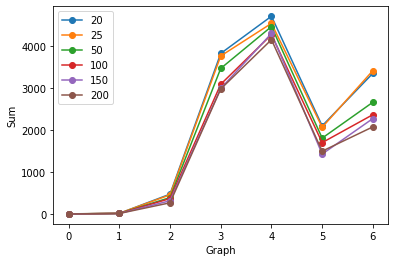

In [20]:
graph_names = ['graph0', 'graph1', 'graph2', 'graph3', 'graph4', 'graph5', 'graph6']
graph_list = [graph0, graph1, graph2, graph3, graph4, graph5, graph6]
unique_colors = []
#sums0, sums1, sums2, sums3, sums4, sums5, sums6 = [],[],[],[],[],[],[]
#sum_list = [sums0, sums1, sums2, sums3, sums4, sums5, sums6]
sum_list = []
compare_list = []
population = [10,25,50,100,150,200]
elite = [2,5,10,20,25,40]

#for p_size, e_size in zip(population, elite):
for size in [20,25,50,100,150,200]:
    MAX_ITERATION = size
    #POPULATION_SIZE = p_size
    #ELITE_SIZE = e_size
    for graph, name in zip(graph_list, graph_names):

        start = time.perf_counter()
        solution, colors = ga(graph)
        end = time.perf_counter()
        unique_colors.append(len(set(colors)))
        timeExec = end - start
        sum_list.append(solution)

        print(name)
        print('Sec: ' + str(timeExec))
        print('Unique colors: ' + str(len(set(colors))))
        print('Sum : ' + str(solution))

        print()
    compare_list.append(unique_colors)
    unique_colors = []

    plt.plot([0,1,2,3,4,5,6], sum_list, '-o',label=size)
    plt.legend(loc='upper left')
    
    sum_list = []
plt.xlabel("Graph")
plt.ylabel("Sum")
plt.savefig('ga1.png')
plt.show()

#kad je elitizam pola populacije onda puca
# izmedju 10 i 250 razlika je u 100 u sumi

Resenje 12
graph0
Sec: 0.05543089999991935
Unique colors: 2
Sum : 12

Resenje 21
graph1
Sec: 0.08054339999944204
Unique colors: 4
Sum : 21

Resenje 275
graph2
Sec: 0.9087910000016564
Unique colors: 14
Sum : 275

Resenje 2947
graph3
Sec: 15.66709720000108
Unique colors: 49
Sum : 2947

Resenje 4281
graph4
Sec: 41.30271410000023
Unique colors: 70
Sum : 4281

Resenje 1300
graph5
Sec: 4.401186099999904
Unique colors: 35
Sum : 1300

Resenje 2143
graph6
Sec: 8.572883500000898
Unique colors: 37
Sum : 2143

Resenje 11
graph0
Sec: 0.06612150000000838
Unique colors: 3
Sum : 11

Resenje 21
graph1
Sec: 0.09965660000125354
Unique colors: 4
Sum : 21

Resenje 218
graph2
Sec: 1.116787100001602
Unique colors: 12
Sum : 218

Resenje 2920
graph3
Sec: 19.613443500000358
Unique colors: 49
Sum : 2920

Resenje 4198
graph4
Sec: 51.117156300000715
Unique colors: 72
Sum : 4198

Resenje 1230
graph5
Sec: 5.423636600000464
Unique colors: 32
Sum : 1230

Resenje 1992
graph6
Sec: 10.744352299998354
Unique colors: 38
Su

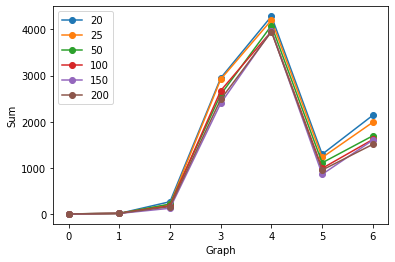

In [21]:
#sums0, sums1, sums2, sums3, sums4, sums5, sums6 = [],[],[],[],[],[],[]
#sum_list = [sums0, sums1, sums2, sums3, sums4, sums5, sums6]
sum_list = []
compare_list = []
population = [10,25,50,100,150,200]
elite = [2,5,10,20,25,40]

#for p_size, e_size in zip(population, elite):
for size in [20,25,50,100,150,200]:
    MAX_ITERATION = size
    #POPULATION_SIZE = p_size
    #ELITE_SIZE = e_size
    for graph, name in zip(graph_list, graph_names):

        start = time.perf_counter()
        solution, colors = hybrid_ga(graph)
        end = time.perf_counter()
        unique_colors.append(len(set(colors)))
        timeExec = end - start
        sum_list.append(solution)

        print(name)
        print('Sec: ' + str(timeExec))
        print('Unique colors: ' + str(len(set(colors))))
        print('Sum : ' + str(solution))

        print()
    compare_list.append(unique_colors)
    unique_colors = []

    plt.plot([0,1,2,3,4,5,6], sum_list, '-o',label=size)
    plt.legend(loc='upper left')
    
    sum_list = []
plt.xlabel("Graph")
plt.ylabel("Sum")
plt.savefig('ga2.png')
plt.show()

Resenje 11
graph0
Sec: 0.6694146000008914
Unique colors: 3
Sum : 11

Resenje 21
graph1
Sec: 0.9138372999987041
Unique colors: 4
Sum : 21

Resenje 308
graph2
Sec: 8.527763800000685
Unique colors: 16
Sum : 308

Resenje 2840
graph3
Sec: 175.79005880000113
Unique colors: 49
Sum : 2840

Resenje 4101
graph4
Sec: 444.9790525999997
Unique colors: 70
Sum : 4101

Resenje 1375
graph5
Sec: 42.17788410000139
Unique colors: 35
Sum : 1375

Resenje 2034
graph6
Sec: 85.97903800000131
Unique colors: 39
Sum : 2034

Resenje 11
graph0
Sec: 1.7432207999991078
Unique colors: 3
Sum : 11

Resenje 21
graph1
Sec: 2.451653799998894
Unique colors: 4
Sum : 21

Resenje 211
graph2
Sec: 23.35238880000179
Unique colors: 12
Sum : 211

Resenje 2773
graph3
Sec: 432.12927280000076
Unique colors: 51
Sum : 2773

Resenje 3926
graph4
Sec: 1067.4715907999998
Unique colors: 62
Sum : 3926

Resenje 1167
graph5
Sec: 103.27911389999645
Unique colors: 31
Sum : 1167

Resenje 1957
graph6
Sec: 201.88479039999947
Unique colors: 35
Sum : 

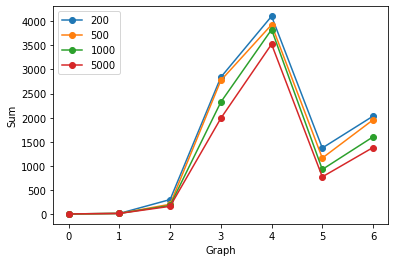

In [60]:
graph_names = ['graph0', 'graph1', 'graph2', 'graph3', 'graph4', 'graph5', 'graph6']
graph_list = [graph0, graph1, graph2, graph3, graph4, graph5, graph6]
unique_colors = []
#sums0, sums1, sums2, sums3, sums4, sums5, sums6 = [],[],[],[],[],[],[]
#sum_list = [sums0, sums1, sums2, sums3, sums4, sums5, sums6]
sum_list = []
compare_list = []
population = [10,25,50,100,150,200]
elite = [2,5,10,20,25,40]

#for p_size, e_size in zip(population, elite):
for size in [200,500,1000,5000]:
    MAX_ITERATION = size
    #POPULATION_SIZE = p_size
    #ELITE_SIZE = e_size
    for graph, name in zip(graph_list, graph_names):

        start = time.perf_counter()
        solution, colors = ga(graph)
        end = time.perf_counter()
        unique_colors.append(len(set(colors)))
        timeExec = end - start
        sum_list.append(solution)

        print(name)
        print('Sec: ' + str(timeExec))
        print('Unique colors: ' + str(len(set(colors))))
        print('Sum : ' + str(solution))

        print()
    compare_list.append(unique_colors)
    unique_colors = []

    plt.plot([0,1,2,3,4,5,6], sum_list, '-o',label=size)
    plt.legend(loc='upper left')
    
    sum_list = []
plt.xlabel("Graph")
plt.ylabel("Sum")
plt.show()

In [44]:
graph0= [[3],[3],[3],[0,1,2,4],[3,5,6,7],[4],[4],[4]]
start = time.perf_counter()
solution, colors = ga(graph0)
#solutionHybrid = hybrid_ga(graph0)
end = time.perf_counter()
print(end-start)
timeExec = end - start

print(colors)
string = "\nIme grafa: graph0" + '\n' + "Resenje "+str(solution)+" Resenje hybrid: "+str(solutionHybrid)+"\nParametri\n" + "Velicina turnira " + str(TOURNAMENT_SIZE) + "\nVelicina populacije " + str(POPULATION_SIZE) + "\n"+ "Verovatnoca mutacije " + str(MUTATION_RATE) + "\n"+ "Maksimalno iteracija " + str(MAX_ITERATION) + "\n"+ "Velicina elitizma " + str(ELITE_SIZE) + "\n" + "Vreme izvrsavanja " + str(timeExec) + "\n"  + "******************************************************" + "\n"
print(string)
#file = open("Parametri_genetski.txt","a")
#file.write(string)



Resenje 11
81.57761089999985
[1, 1, 1, 2, 3, 1, 1, 1]

Ime grafa: graph0
Resenje 11 Resenje hybrid: (11, <__main__.Individual object at 0x0000026BCA3FA198>)
Parametri
Velicina turnira 10
Velicina populacije 250
Verovatnoca mutacije 0.1
Maksimalno iteracija 8500
Velicina elitizma 60
Vreme izvrsavanja 81.57761089999985
******************************************************

